# Algoritmos de Clasificacion 

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos los archivos con el Train y Test set
train = pd.read_csv('trainset.csv')
train = train.set_index('id')
train.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
146790,2.217079,0.0,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
142735,4.304625,0.0,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
971,4.304625,1.0,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
61341,3.828397,1.0,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
153359,3.828397,1.0,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3


In [3]:
train.shape

(55543, 13)

In [7]:
train.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

In [4]:
test = pd.read_csv('testset.csv')
test = test.set_index('id')
test.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
116295,3.873489,1.0,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
101223,1.595405,1.0,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
47928,4.359420,1.0,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
88722,3.873489,1.0,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
111363,4.359420,0.0,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2


In [5]:
test.shape

(13920, 13)

In [6]:
#Verificamos que no hay valores nulos 
test.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

**Entrenamiento como Problema de Clasificacion**

En este caso nuestro target es la variable creada **ClasePopularidad** que tiene los 5 niveles de popularidad definidos (ver Notebook de Limpieza de Datos).

Veamos la proporcion de cada clase, para ver que tan desbalanceada esta la variable target


In [8]:
train['ClasePopularidad'].value_counts(normalize = True)

2    0.358173
1    0.319950
3    0.254956
4    0.065445
5    0.001476
Name: ClasePopularidad, dtype: float64

Vemos que las clases 1,2 y 3 resultan en el 92% de todos los datos, mientras que las clases 4 y 5 estan reducidas al 8%. Por lo que los datos estan muy desbalanceados. 

In [10]:
'''Dividimos el Train data set en Atributos y Target'''

X_train = train.drop(['popularity','ClasePopularidad'],axis = 1)
y_train = train['ClasePopularidad']


In [13]:
'''Dividimos el Test Set en Atributos y Target'''

X_test = test.drop(['popularity','ClasePopularidad'],axis = 1)
y_test = test['ClasePopularidad']

## 1- Arbol de Decision

In [11]:
'''Creamos el modelo'''


modelArbol= tree.DecisionTreeClassifier(random_state = 13) 
modelArbol.fit(X_train, y_train) 


DecisionTreeClassifier(random_state=13)

In [14]:
#prediccion

yPred = modelArbol.predict(X_test)
yPred

array([2, 2, 4, ..., 2, 2, 1], dtype=int64)

### Evaluacion del Modelo - Metricas

In [15]:
#Evaluacion para Clasificacion

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

#Report
f1 = f1_score(y_test,yPred,average='weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test,yPred))


confusion_matrixArbol = pd.DataFrame(confusion_matrix(y_test, yPred))
confusion_matrixArbol.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixArbol.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixArbol)

El F1 Score del modelo es de 0.3315639447407612
              precision    recall  f1-score   support

           1       0.37      0.37      0.37      4488
           2       0.36      0.35      0.36      4914
           3       0.31      0.31      0.31      3592
           4       0.10      0.11      0.11       904
           5       0.05      0.05      0.05        22

    accuracy                           0.33     13920
   macro avg       0.24      0.24      0.24     13920
weighted avg       0.33      0.33      0.33     13920

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  1645                  1578             1005   
MediaBaja             1593                  1732             1223   
Media                  985                  1180             1120   
MediaAlta              217                   309              273   
Alta                     6                     8                5   

           Prediccion MediaAlta  Prediccion Alta

In [16]:
yTest = y_test.reset_index()
ResultsClas = yTest.drop('id', axis = 1)
ResultsClas['prediccion'] = yPred
ResultsClas.loc[ResultsClas['ClasePopularidad']>4]
    

,ClasePopularidad,prediccion
1474,5,2
1617,5,2
1738,5,2
2335,5,3
2857,5,4
2969,5,2
3429,5,1
3441,5,3
3540,5,1
4125,5,5


In [17]:
'''Generamos una funcion que nos de el Valor de F1 para diferentes valores de Poda, de 1 a 15'''

poda = np.arange(1,15)
accuracy = []
result = []

for i in poda:
    modelArbol= tree.DecisionTreeClassifier(random_state = 13,max_depth = i)  #Generamos el clasificador con la poda seleccionada
    modelArbol.fit(X_train, y_train) 
    yPred = modelArbol.predict(X_test) #Generamos la prediccion
    
    a= accuracy_score(y_test,yPred)
    f = f1_score(y_test,yPred,average='weighted')  
    accuracy.append(a)
    result.append(f)
result


[0.28496148596146714,
 0.28496148596146714,
 0.31587119069874137,
 0.29961017653519356,
 0.36443959213527194,
 0.36287256947960317,
 0.36999719928051733,
 0.3615170976176851,
 0.3667095582091457,
 0.3719411722562057,
 0.37102657711136144,
 0.3627798890840142,
 0.3656344286929608,
 0.36305806467663254]

In [18]:
accuracy

[0.3737068965517241,
 0.3737068965517241,
 0.3790948275862069,
 0.3813936781609195,
 0.38548850574712645,
 0.39001436781609194,
 0.3956896551724138,
 0.39188218390804597,
 0.3898706896551724,
 0.38785919540229885,
 0.38491379310344825,
 0.3783764367816092,
 0.38038793103448276,
 0.37658045977011495]

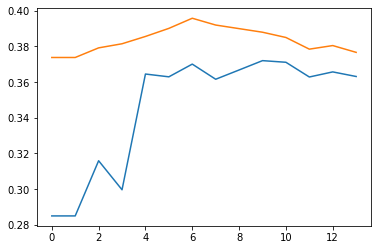

In [19]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(result)
plt.plot(accuracy)

# 2- Random Forest

In [20]:
'''Utilizando la misma division que se uso para la Regresion por Arbol de decision'''

X_test
y_train

id
146790    2
142735    1
971       4
61341     1
153359    3
         ..
70247     2
44415     4
142189    3
62804     2
95312     1
Name: ClasePopularidad, Length: 55543, dtype: int64

In [21]:
'''Creamos el modelo'''

modelo_random_forest = RandomForestClassifier(n_estimators = 25) 
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [22]:
#Se hace la prediccion
yPredForest = modelo_random_forest.predict(X_test)

In [23]:
#Evaluacion con Metricas

f1Forest = f1_score(y_test,yPredForest,average='weighted')
print(f'El F1 Score del modelo es de {f1Forest}')
print(classification_report(y_test,yPredForest))


confusion_matrixForest = pd.DataFrame(confusion_matrix(y_test, yPredForest))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)

El F1 Score del modelo es de 0.365524101450168
              precision    recall  f1-score   support

           1       0.40      0.46      0.43      4488
           2       0.37      0.46      0.41      4914
           3       0.37      0.26      0.31      3592
           4       0.33      0.03      0.05       904
           5       0.00      0.00      0.00        22

    accuracy                           0.38     13920
   macro avg       0.29      0.24      0.24     13920
weighted avg       0.38      0.38      0.37     13920

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  2073                  1853              552   
MediaBaja             1828                  2267              808   
Media                 1067                  1558              935   
MediaAlta              259                   390              228   
Alta                    12                     6                3   

           Prediccion MediaAlta  Prediccion Alta 

C:\Users\acana\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acana\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acana\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
'''Similar al caso del Arbol, haremos un loop para calcular Accuracies a diferentes valore de n_estimator'''

import time   #Quiero ver tambien cuanto tiempo lleva el training segun el numero de estimadores
T = []
estimators = np.arange(10,100,10)
accuracyForest = []
resultForest = []

for i in estimators:
    inicio = time.process_time()
    modelo_random_forest = RandomForestClassifier(n_estimators = i) 
    modelo_random_forest.fit(X_train, y_train)
    yPredForest = modelo_random_forest.predict(X_test)
    fin = time.process_time()
    t = fin-inicio
    T.append(t)
    print(t)
    
    
    a= accuracy_score(y_test,yPredForest)
    f = f1_score(y_test,yPredForest,average='weighted')  
    accuracyForest.append(a)
    resultForest.append(f)

resultForest



1.421875
2.84375
4.296875
5.59375
6.984375
8.46875
9.78125
11.265625
12.546875


[0.3584711846596739,
 0.37107239734308206,
 0.37059313866263627,
 0.3705767528478167,
 0.3825714845656504,
 0.3795962929194708,
 0.3867786479273822,
 0.37844049211758424,
 0.38610646998270987]

In [25]:
accuracyForest

[0.3724137931034483,
 0.38642241379310344,
 0.38620689655172413,
 0.3867097701149425,
 0.398132183908046,
 0.3961925287356322,
 0.40323275862068964,
 0.39511494252873564,
 0.40337643678160917]

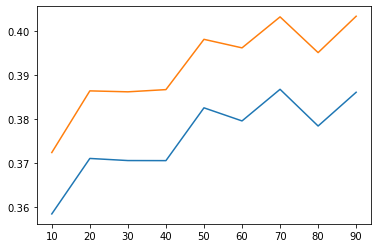

In [26]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(estimators, resultForest)
plt.plot(estimators, accuracyForest)

## Dummy Classifier

In [39]:
moda = test['ClasePopularidad'].mode()[0]
y_Dummy = test['ClasePopularidad'].apply(lambda x: moda)
y_Dummy

id
116295    2
101223    2
47928     2
88722     2
111363    2
         ..
159895    2
37399     2
139733    2
136482    2
103656    2
Name: ClasePopularidad, Length: 13920, dtype: int64

In [40]:
f1Dummy= f1_score(y_test,y_Dummy,average='weighted')
print(f'El F1 Score del Modelo mas facil es {f1Dummy}')

El F1 Score del Modelo mas facil es 0.18421224637760766


## Resumen

In [43]:
#Table Resumen

Resumen = pd.DataFrame([[0.372,'poda = 10'],[0.387,'estimadores = 70'],[0.184,'no aplica']],index = ['Arbol','Random Forest','Dummy'], columns = ['Score','Parametro'])

In [44]:
Resumen

,Score,Parametro
Arbol,0.372,poda = 10
Random Forest,0.387,estimadores = 70
Dummy,0.184,no aplica
